# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 


##Age
#null hypothesis - There is no difference between age and survival
#alternative hypothesis - There is a significant difference between age and survival

In [1]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

# Get to know the data a bit
titanic.info()

titanic.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic = titanic.dropna()

survived = titanic.iloc[(titanic["Survived"] == 1).values][["Age"]]
not_survived = titanic.iloc[(titanic["Survived"] == 0).values][["Age"]]

survived.head
not_survived.head

<bound method NDFrame.head of       Age
6    54.0
27   19.0
54   65.0
62   45.0
75   25.0
92   46.0
96   71.0
102  21.0
110  47.0
118  24.0
124  54.0
137  37.0
139  24.0
148  36.5
170  61.0
174  56.0
177  50.0
205   2.0
245  44.0
251  29.0
252  62.0
262  52.0
263  40.0
273  37.0
292  36.0
297   2.0
331  45.5
332  38.0
336  29.0
339  45.0
377  27.0
434  50.0
438  64.0
452  30.0
456  65.0
462  47.0
487  58.0
492  55.0
498  25.0
505  18.0
515  47.0
536  45.0
544  50.0
583  36.0
625  61.0
659  58.0
662  47.0
671  31.0
698  49.0
699  42.0
715  19.0
741  36.0
745  70.0
748  19.0
772  57.0
782  29.0
789  46.0
806  39.0
867  31.0
872  33.0>

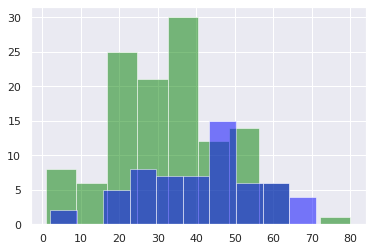

In [3]:
plt.hist(survived['Age'], alpha = .5, color='green')
plt.hist(not_survived['Age'], alpha = .5, color='blue')
plt.show()

In [4]:
print(stats.describe(survived['Age']))
print(stats.describe(not_survived['Age']))

DescribeResult(nobs=123, minmax=(0.92, 80.0), mean=32.905853658536586, variance=221.71546053578567, skewness=0.11036517600265433, kurtosis=0.031225201077919262)
DescribeResult(nobs=60, minmax=(2.0, 71.0), mean=41.35, variance=247.73135593220334, skewness=-0.30756108127889464, kurtosis=-0.2764299013556979)


In [5]:
stats.ttest_ind(survived['Age'], not_survived['Age'])

Ttest_indResult(statistic=-3.53435125095576, pvalue=0.0005189503307881672)

In [6]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(survived['Age'], not_survived['Age'])

'The difference in means at the 95% confidence interval (two-tail) is between 3.670662752222926 and 13.217629930703906.'

The the passenger was the more likely they were to have survived on the titanic. Yes the difference in means in was statistically signifcant. We have a p value of .05%. We can reject the null hypothesis of no difference between means. 

2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

#Fare
##null hypothesis - There is no difference between fare and survival
##alternative hypothesis - There is a significant difference between fare and survival

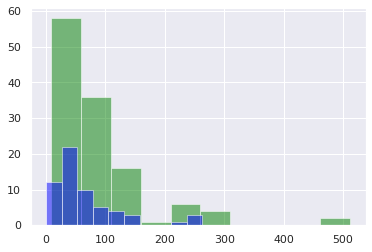

DescribeResult(nobs=123, minmax=(8.05, 512.3292), mean=85.82110650406504, variance=6698.362025553565, skewness=2.7788223952302076, kurtosis=10.470208979497217)
DescribeResult(nobs=60, minmax=(0.0, 263.0), mean=64.04826166666666, variance=3806.0826273061334, skewness=1.8178850690104182, kurtosis=3.0369847427015557)


In [7]:
survived = titanic.iloc[(titanic["Survived"] == 1).values][["Fare"]]
not_survived = titanic.iloc[(titanic["Survived"] == 0).values][["Fare"]]

plt.hist(survived['Fare'], alpha = .5, color='green')
plt.hist(not_survived['Fare'], alpha = .5, color='blue')
plt.show()

print(stats.describe(survived['Fare']))
print(stats.describe(not_survived['Fare']))

In [8]:
titanic["Fare"].value_counts()

26.5500     7
53.1000     5
13.0000     4
120.0000    4
263.0000    4
           ..
32.3208     1
13.7917     1
5.0000      1
30.6958     1
50.4958     1
Name: Fare, Length: 93, dtype: int64

In [9]:
print(stats.ttest_ind(survived['Fare'], not_survived['Fare']))

titanic.corr(method="pearson")


Ttest_indResult(statistic=1.8225248632226043, pvalue=0.0700255771493731)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


Yes the is a very weak 0.13 correlation between fare price and survival. This difference is not statistically significant. We have a 7% p value which is not significant. We also have kurtosis and skewness outside what we would expect with a normal distribution. 